## Clasificación de series de tiempo

### Estacionariedad

**Serie de tiempo: lynx**

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] 1821    1

[1] 1934    1

A Time Series:
  [1] 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835
 [16] 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850
 [31] 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865
 [46] 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880
 [61] 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
 [76] 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910
 [91] 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
[106] 1926 1927 1928 1929 1930 1931 1932 1933 1934

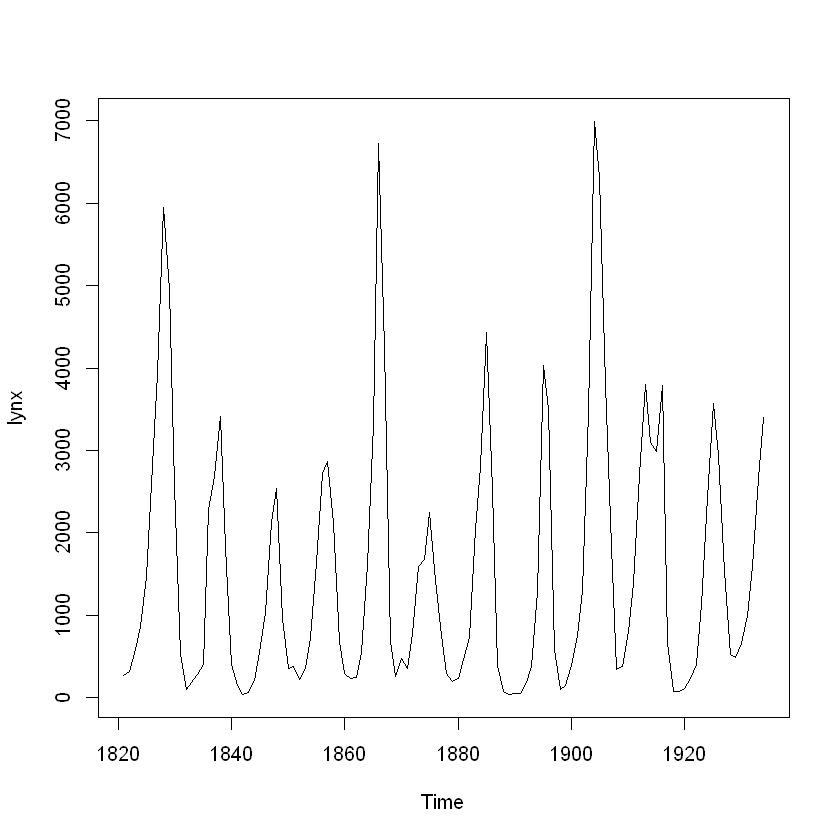

In [1]:
library(tseries)
# Lectura y descripcion general
data(lynx)
help(lynx)
start(lynx)
end(lynx)
time(lynx)
plot(lynx)

### Tendencia

El modelo no es adecuado

La serie de tiempo NO muestra tendencia lineal|

In [2]:
tend.ly <- lm(lynx~time(lynx), data = lynx)
summary(tend.ly)


Call:
lm(formula = lynx ~ time(lynx), data = lynx)

Residuals:
   Min     1Q Median     3Q    Max 
 -1594  -1211   -755   1032   5366 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -4630.034   8493.112  -0.545    0.587
time(lynx)      3.285      4.523   0.726    0.469

Residual standard error: 1589 on 112 degrees of freedom
Multiple R-squared:  0.004689,	Adjusted R-squared:  -0.004198 
F-statistic: 0.5276 on 1 and 112 DF,  p-value: 0.4691


### Varianza

Con alfa de 0.10 se rechaza H0

Serie estacionaria en varianza

In [3]:
adf.test(lynx, alternative = 'stationary')

Warning message in adf.test(lynx, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  lynx
Dickey-Fuller = -6.3068, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


### Conclusión

La serie es estacionaria

# Modelado de series estacionarias
### Autocorrelograma

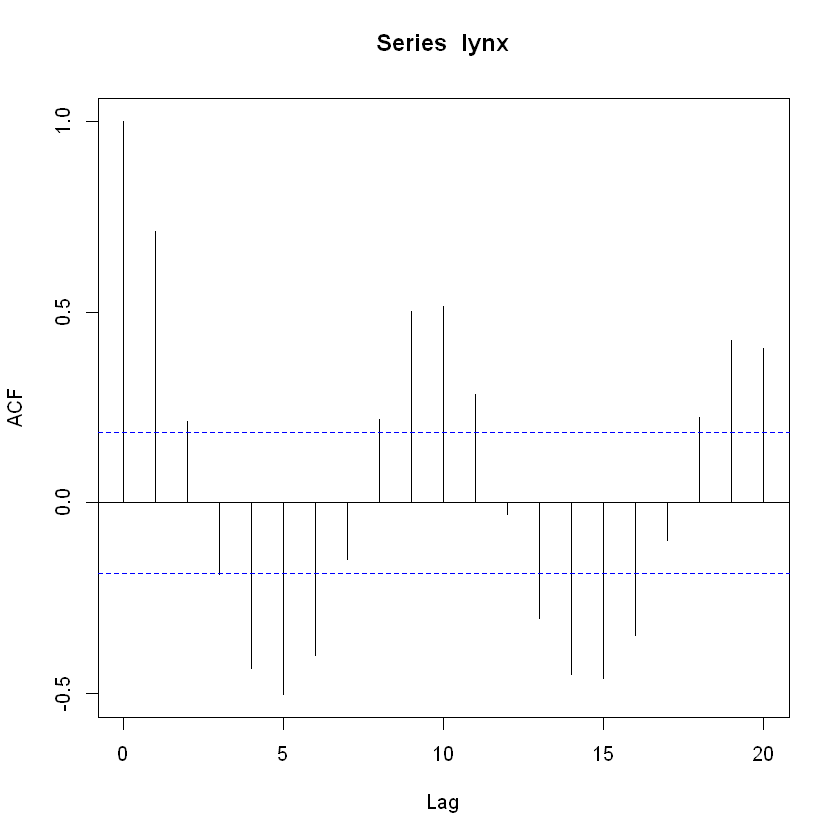

In [4]:
# Completo
acf(lynx)

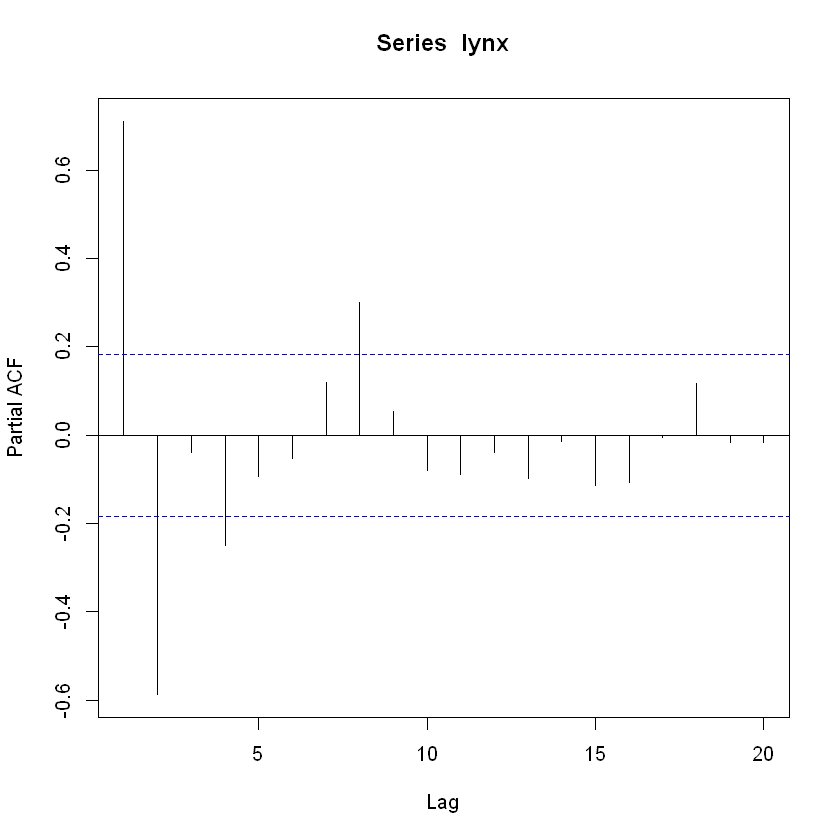

In [5]:
# Parcial
pacf(lynx)

## Sugerencia de modelo
#### Buscar el mejor AR(p)

In [6]:
ar(lynx)
arima(lynx, order=c(1,0,0), method = 'ML')


Call:
ar(x = lynx)

Coefficients:
      1        2        3        4        5        6        7        8  
 1.0379  -0.6063   0.1910  -0.1411  -0.0207   0.0199  -0.2046   0.3012  

Order selected 8  sigma^2 estimated as  726897


Call:
arima(x = lynx, order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.7173  1550.5378
s.e.  0.0649   356.6875

sigma^2 estimated as 1210543:  log likelihood = -960.5,  aic = 1926.99

In [7]:
AIC(arima(lynx, order=c(1,0,0), method = 'ML'))

[1] 1926.991

### Buscar el mejor MA(q)

In [29]:
AIC(arima(lynx, order=c(0,0,1), method = 'ML'))
AIC(arima(lynx, order=c(0,0,2), method = 'ML'))
AIC(arima(lynx, order=c(0,0,3), method = 'ML'))

[1] 1917.947

[1] 1890.061

[1] 1887.771

In [27]:
# Algoritmo para buscar el mejor q para MA
aux <- Inf
for(i in 1:12){
    if(AIC(arima(lynx, order=c(0,0,i), method = 'ML')) < aux){
        aux <- AIC(arima(lynx, order=c(0,0,i), method = 'ML'))
        MA.mejor <- i
    }
}
MA.mejor
aux

[1] 10

[1] 1881.807

### Buscar el mejor ARMA(p,q)

In [28]:
# Algoritmo para buscar el mejor p y q de ARMA
arma.aic <- Inf
for(j in 1:10){
    for(i in 1:10){
        if(AIC(arima(lynx, order=c(j,0,i), method = 'ML')) < arma.aic){
            arma.aic <- AIC(arima(lynx, order=c(j,0,i), method = 'ML'))
            ARMA.mejor <- c(j,i)
        }
    }
}
ARMA.mejor
arma.aic

Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i), method = "ML"):
"possible convergence problem: optim gave code = 1"
Warning message in arima(lynx, order = c(j, 0, i

[1] 2 4

[1] 1858.108

## Predicciones

**Predicciones completas**

In [1]:
predict(arima(lynx, order = c(8,0,0), method = 'ML'), n.ahead = 80)

$pred
Time Series:
Start = 1935 
End = 2014 
Frequency = 1 
 [1] 3111.9233 2161.7620 1284.6904  771.5956  622.3185  719.2470 1123.4850
 [8] 1825.5874 2459.6247 2631.4357 2324.4486 1784.7944 1282.2785  953.4422
[15]  843.4446 1003.5534 1414.5875 1890.6119 2195.9413 2210.2752 1976.9955
[22] 1631.8468 1305.3473 1095.5045 1076.6931 1261.7197 1567.9074 1853.8201
[29] 1999.7758 1965.9756 1790.8208 1552.3213 1338.9159 1229.3636 1263.9866
[36] 1421.9344 1629.1030 1796.4988 1862.8838 1814.4004 1679.7647 1515.3438
[43] 1385.7297 1339.9706 1391.1117 1511.2111 1646.4450 1742.7759 1767.0742
[50] 1716.2576 1615.3165 1506.6387 1433.2901 1421.7057 1471.5953 1558.1686
[57] 1644.6154 1697.6766 1699.7055 1653.8251 1581.3371 1512.4872 1473.9800
[64] 1478.4870 1520.7085 1581.1182 1634.8673 1661.7309 1653.3982 1615.7834
[71] 1565.7751 1523.8516 1505.7220 1516.5192 1549.7041 1590.6147 1622.7901
[78] 1634.4343 1622.6150 1593.7553

$se
Time Series:
Start = 1935 
End = 2014 
Frequency = 1 
 [1]  785.4909 1142.0748 1203.7497 1204.5781 1211.6590 1231.6562 1245.2575
 [8] 1269.9310 1273.4786 1295.9664 1357.1575 1396.8456 1406.6632 1406.8151
[15] 1412.4132 1425.3772 1443.9690 1451.9428 1452.1717 1462.6289 1480.3483
[22] 1491.0560 1492.9467 1493.1713 1497.4861 1506.8804 1514.2690 1515.5547
[29] 1516.2707 1521.3453 1527.7906 1531.2775 1531.7352 1532.2051 1535.3237
[36] 1539.7089 1542.0411 1542.1703 1542.8704 1545.2966 1547.9198 1549.1167
[43] 1549.1558 1549.6878 1551.4255 1553.2102 1553.8666 1553.8667 1554.3683
[50] 1555.5612 1556.6304 1556.9753 1556.9786 1557.3860 1558.2389 1558.9096
[57] 1559.0718 1559.0891 1559.4129 1559.9812 1560.3843 1560.4617 1560.4879
[64] 1560.7428 1561.1295 1561.3664 1561.3968 1561.4289 1561.6189 1561.8731
[71] 1562.0111 1562.0219 1562.0556 1562.1971 1562.3626 1562.4394 1562.4419
[78] 1562.4734 1562.5753 1562.6815

**SOLO Predicciones**

In [5]:
AR.Prediccion <- predict(arima(lynx, order = c(8,0,0), method = 'ML'), n.ahead = 80)$pred
MA.Prediccion <- predict(arima(lynx, order = c(0,0,10), method = 'ML'), n.ahead = 80)$pred
ARMA.Prediccion <- predict(arima(lynx, order = c(2,0,4), method = 'ML'), n.ahead = 80)$pred

### Graficos de las predicciones

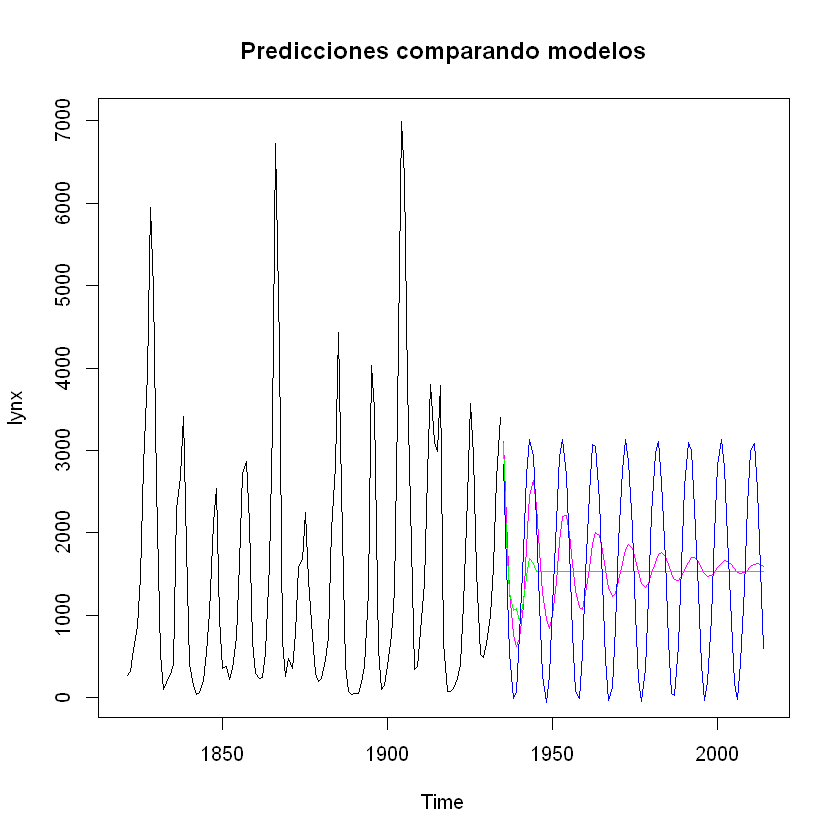

In [8]:
plot(lynx,
    main = "Predicciones comparando modelos",
    xlim = c(1820,2014))
lines(AR.Prediccion,
     col = 'magenta')
lines(MA.Prediccion,
     col = 'green')
lines(ARMA.Prediccion,
     col = 'blue')

### AIC comparativo

In [11]:
AIC(arima(lynx, order = c(8,0,0), method = 'ML'))
AIC(arima(lynx, order = c(0,0,10), method = 'ML'))
AIC(arima(lynx, order = c(2,0,4), method = 'ML'))

[1] 1866.433

[1] 1881.807

[1] 1858.108